**K-Nearest Neighbors (KNN) Classifier**
1.  K-Nearest Neighbors (KNN) is a non-parametric, instance-based classification algorithm that assigns a class to a new observation based on the majority class of its ‘k’ closest neighbors in the feature space. It relies on a distance metric (such as Euclidean or Manhattan) to determine similarity between data points, making it intuitive and easy to understand.
2.   KNN is important because it is simple, interpretable, and versatile, capable of handling multiclass classification problems without assuming any underlying data distribution. It is especially useful for datasets where decision boundaries are non-linear and where the relationships between features and classes may be complex. Its utility spans a wide range of applications, including pattern recognition, medical diagnosis, image classification, and recommendation systems, making it a valuable tool in any machine learning pipeline.

2.   In this project, we applied KNN to the Wine dataset to classify wines based on chemical properties, demonstrating its ability to provide accurate and intuitive predictions even with relatively small datasets.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib, warnings

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

warnings.filterwarnings("ignore")
sns.set(style="whitegrid", context="notebook")
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("scikit-learn version:", sklearn_version)


scikit-learn version: 1.6.1


In [2]:
#  Load Wine dataset
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
df = data.frame

# Features and target
X = df.drop(columns=['target'])
y = df['target']

print("First 10 rows of dataset:")
display(pd.concat([X, y], axis=1).head(10))


First 10 rows of dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [3]:
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    floa

In [4]:
print("\nSummary statistics:")
display(df.describe().T)


Summary statistics:


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


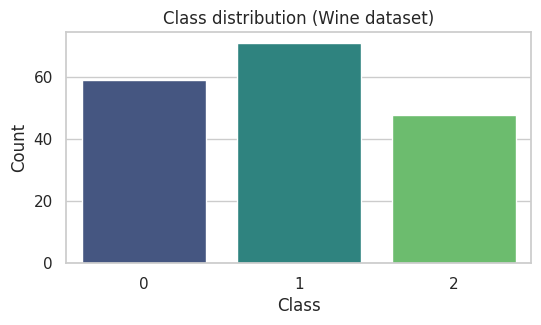

In [5]:
# Class distribution
plt.figure(figsize=(6,3))
sns.countplot(x=y, palette='viridis')
plt.title("Class distribution (Wine dataset)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

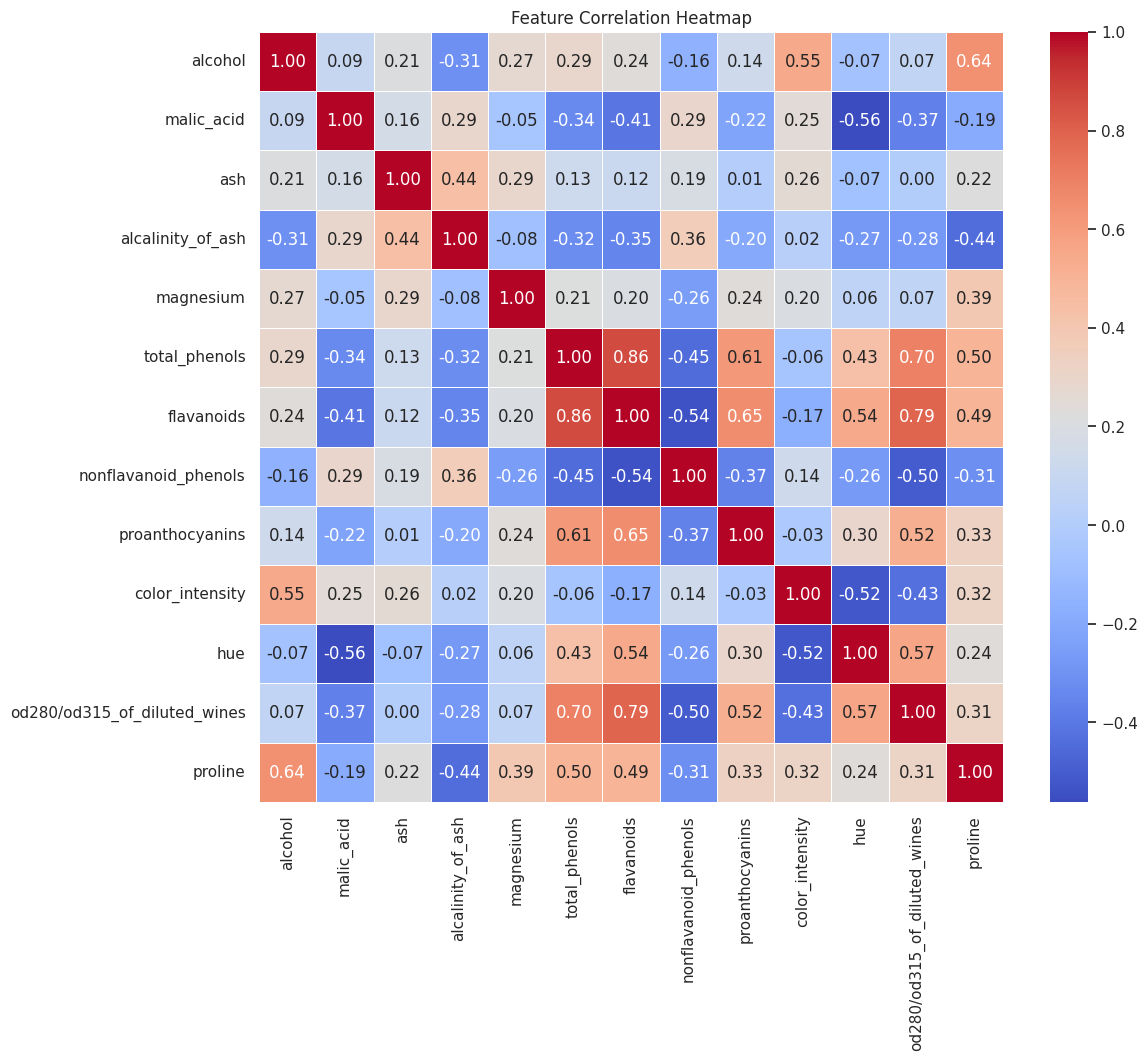

In [6]:
# Correlation heatmap of features
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.4)
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# Cell 4 — Check class balance
print("Class distribution (counts):")
print(y.value_counts())

print("\nClass distribution (percentages):")
print(y.value_counts(normalize=True) * 100)


Class distribution (counts):
target
1    71
0    59
2    48
Name: count, dtype: int64

Class distribution (percentages):
target
1    39.887640
0    33.146067
2    26.966292
Name: proportion, dtype: float64


In [8]:
# Train/Test Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
print("Train shape:", X_train.shape)
print("Test shape: ", X_test.shape)


Train shape: (142, 13)
Test shape:  (36, 13)


In [11]:
import joblib

# Save the split datasets
joblib.dump(X_train, '/content/X_train.joblib')
joblib.dump(X_test, '/content/X_test.joblib')
joblib.dump(y_train, '/content/y_train.joblib')
joblib.dump(y_test, '/content/y_test.joblib')

print("Train/Test datasets saved successfully!")


Train/Test datasets saved successfully!


In [9]:
# Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Baseline KNN (default parameters)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_baseline = knn.predict(X_test_scaled)

# Baseline metrics
acc = accuracy_score(y_test, y_pred_baseline)
prec = precision_score(y_test, y_pred_baseline, average='weighted')
rec = recall_score(y_test, y_pred_baseline, average='weighted')
f1 = f1_score(y_test, y_pred_baseline, average='weighted')

print("Baseline KNN Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")


Baseline KNN Performance:
Accuracy:  0.9722
Precision: 0.9747
Recall:    0.9722
F1-score:  0.9724


In [14]:
# Hyperparameter tuning for KNN
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_scaled, y_train)

best_knn = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'}


Tuned KNN Performance:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000


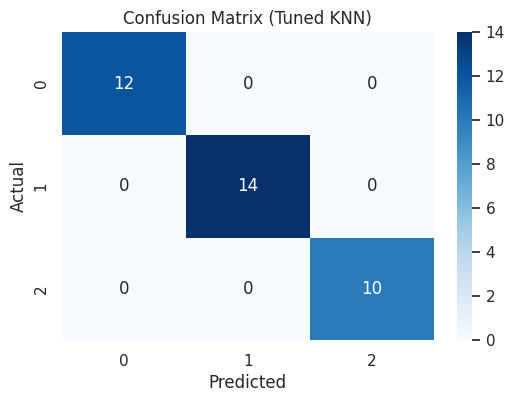

In [15]:
# Evaluate tuned KNN on test set
y_pred = best_knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Tuned KNN Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Tuned KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
# Cross-validation on training data
cv_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", np.round(cv_scores, 4))
print("Mean CV accuracy:", np.round(cv_scores.mean(), 4))


Cross-validation accuracy scores: [0.9655 0.9655 1.     1.     1.    ]
Mean CV accuracy: 0.9862


In [18]:
#  Save KNN model and scaler
joblib.dump(best_knn, '/content/knn_best_model.joblib')
joblib.dump(scaler, '/content/knn_scaler.joblib')
print("KNN model and scaler saved successfully!")


KNN model and scaler saved successfully!
